In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    

In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)


In [3]:
fetch_housing_data()
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


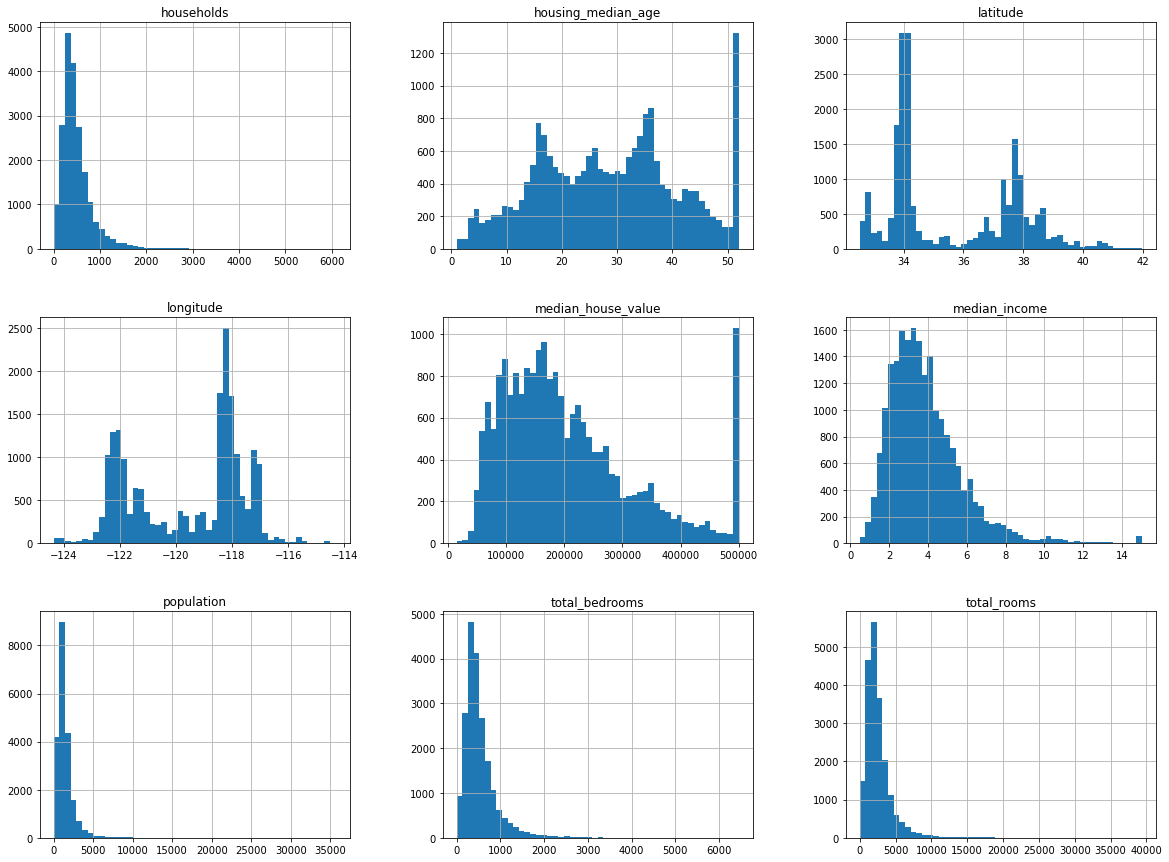

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [8]:
# splitting random data
import numpy as np
def split_train_test(data, test_ratio):
    # array of random permutation
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size] # first test_set_size
    train_indices = shuffled_indices[test_set_size:] # from test_set_size to last
    return data.iloc[test_indices], data.iloc[train_indices]

In [9]:
test_set, train_set = split_train_test(housing, 0.2)

len(test_set)
len(train_set)

16512

<AxesSubplot:>

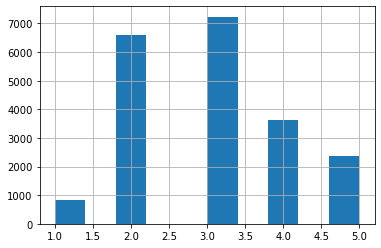

In [10]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()


In [11]:
# Stratified Sampling
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=39)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

strat_train_set["income_cat"].value_counts()

3    5789
2    5265
4    2911
5    1889
1     658
Name: income_cat, dtype: int64

In [12]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(labels="income_cat", axis=1, inplace=True)

# now we have split the input data (housing) into strat_train_set and strat_test_set

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

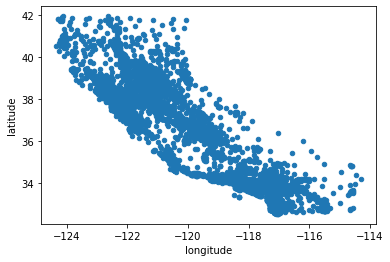

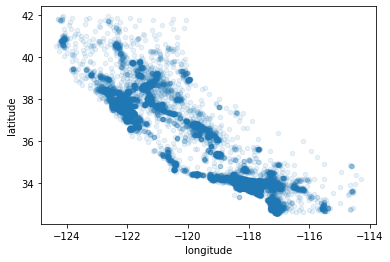

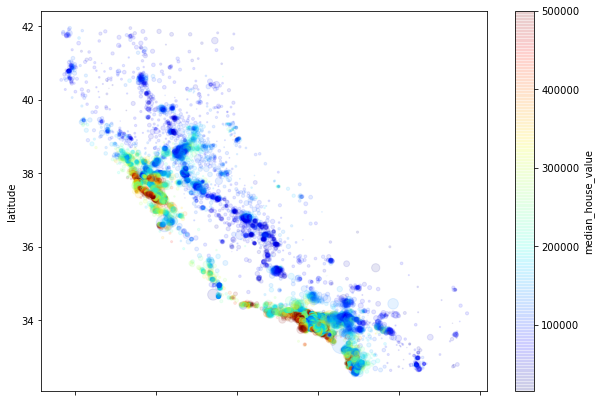

In [13]:
# Visualizing Data
housing.plot(kind="scatter", x="longitude", y="latitude")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1, s=housing["population"]/100, figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True)

In [14]:
# Using Correlation Matrix to find relation

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

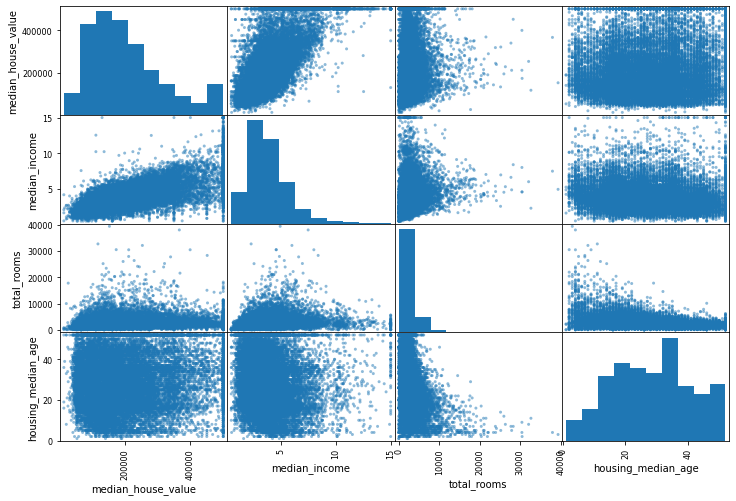

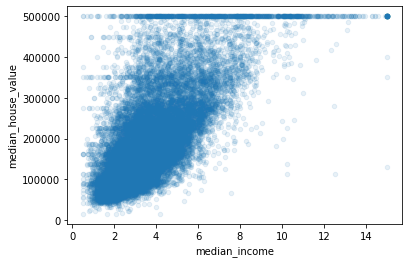

In [15]:
# Using Pandas scatter_matix() to find relation
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12,8))

# Just plotting a scatter matrix between 2 attributes
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [16]:
# Adding some extra attributes to visualize
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [17]:
# PREPARING DATA FOR TRAINING ALGORITHMS
# Separating X and y
housing = strat_train_set.drop("median_house_value" ,axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Separating Classification type and Numerical type attributes
housing_num = housing.drop("ocean_proximity", axis=1)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# Trying out fit()
imputer.fit(housing_num)
imputer.statistics_

# Trying out transform()
X = imputer.transform(housing_num)
housing_num_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)



In [18]:
# Custom Transformers - Creating own class to transform data
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3,4,5,6

# Here comes the class
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, households_ix] # all elements of column 3 (rooms_ix) by coloumn 6 (households_ix)
        population_per_household = X[:, population_ix]/X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

# What does above class do?
# if add_bedrooms_per_room is true, adds it as an extra attribute else not
# it always adds attributes, rooms_per_household and population_per_household      

In [19]:
# Standard Scaler and Pipeline

# Handling Numerical Data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([ ('imputer', SimpleImputer(strategy="median")), ('attribs_adder', CombinedAttributesAdder()), ('std_scaler', StandardScaler()) ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

# Handling Categorical Data
housing_cat = housing[["ocean_proximity"]]
housing_cat.head()

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

cat_encoder.categories_

# Handling both Numerical and Categorical data at once
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([ ("num", num_pipeline, num_attribs), ("cat", OneHotEncoder(), cat_attribs) ])
housing_prepared = full_pipeline.fit_transform(housing)



In [20]:
# Trying out Linear Regression

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

# Comparing actual and Predicted data
print("predictions: ", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

# Calculating RMSE
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

predictions:  [270050.08675578  68448.79356854 172447.04157701 258940.68590917
 140906.97208563]
Labels: [233900.0, 87300.0, 139300.0, 212200.0, 157500.0]


68476.51083539237

In [21]:
# Trying out DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
treemse = mean_squared_error(housing_predictions, housing_labels)
treermse = np.sqrt(treemse)
treemse

# It shows that the model has very badly overfit the training set

0.0

In [29]:
# Trying out Cross Validation on Various models

from sklearn.model_selection import cross_val_score
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

# Lesser the score, the better as neg_mean_squared_error is used   
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
rand_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
rand_rmse_scores = np.sqrt(-rand_scores)
display_scores(rand_rmse_scores)

Scores: [66889.89130556 71003.22409415 72444.8814538  71203.85887294
 77470.56180421 72446.7994413  71011.82535294 67377.62043315
 68852.16073735 70356.38618123]
Mean: 70905.72096766335
Standard deviation: 2846.8225070731314
Scores: [65924.64979465 69357.96686212 66948.09128087 69775.10401223
 72466.49522802 68607.00917593 73041.13438398 65165.36117044
 68566.27016454 67765.2805627 ]
Mean: 68761.73626354852
Standard deviation: 2423.803733299017
Scores: [47240.21554214 50810.82016392 49199.73431432 50769.54342754
 54082.38929495 51287.90142736 50428.37226025 49482.45807928
 50787.10070248 49560.68508598]
Mean: 50364.92202982183
Standard deviation: 1666.2308049265796


In [31]:
# Saving all the current models

import joblib
joblib.dump(forest_reg, "Random_Forest_Regressor.pkl")
joblib.dump(tree_reg, "Decision_tree_regressor.pkl")
joblib.dump(lin_reg, "Linear_Regression.pkl")

['Linear_Regression.pkl']

In [38]:
# Grid Search
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3,10,30], 'max_features': [2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)
grid_search.best_params_

grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63915.9765179313 {'max_features': 2, 'n_estimators': 3}
55167.12076716466 {'max_features': 2, 'n_estimators': 10}
52715.77336531931 {'max_features': 2, 'n_estimators': 30}
60273.47719177641 {'max_features': 4, 'n_estimators': 3}
52834.364438207216 {'max_features': 4, 'n_estimators': 10}
50255.20891575139 {'max_features': 4, 'n_estimators': 30}
59348.190703761305 {'max_features': 6, 'n_estimators': 3}
52163.187933891204 {'max_features': 6, 'n_estimators': 10}
50041.201584526534 {'max_features': 6, 'n_estimators': 30}
58191.456160734146 {'max_features': 8, 'n_estimators': 3}
52034.545601883205 {'max_features': 8, 'n_estimators': 10}
49901.6498058342 {'max_features': 8, 'n_estimators': 30}
62399.23482152767 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54547.869926995336 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59489.670385964055 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52249.15090776885 {'bootstrap': False, 'max_features': 3, 'n_estimator

In [39]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.76975305e-02, 5.95538786e-02, 4.29449475e-02, 1.41896734e-02,
       1.56371386e-02, 1.49253859e-02, 1.35082949e-02, 3.64655909e-01,
       5.52869714e-02, 1.13714081e-01, 5.51896673e-02, 8.40137634e-03,
       1.69117928e-01, 3.17159027e-04, 1.49375276e-03, 3.36630566e-03])

In [40]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36465590889528937, 'median_income'),
 (0.1691179281411901, 'INLAND'),
 (0.11371408108854925, 'pop_per_hhold'),
 (0.06769753050564839, 'longitude'),
 (0.059553878642093834, 'latitude'),
 (0.055286971357363886, 'rooms_per_hhold'),
 (0.055189667288800176, 'bedrooms_per_room'),
 (0.042944947532371915, 'housing_median_age'),
 (0.015637138573714467, 'total_bedrooms'),
 (0.014925385857170717, 'population'),
 (0.014189673412388826, 'total_rooms'),
 (0.013508294926557756, 'households'),
 (0.008401376336104127, '<1H OCEAN'),
 (0.003366305661202572, 'NEAR OCEAN'),
 (0.0014937527550529903, 'NEAR BAY'),
 (0.00031715902650172287, 'ISLAND')]

In [42]:
# Evaluate on Test Set

final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

48427.557733266774